In [195]:
# Load libraries
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [196]:
# Load the dataset
df = pd.read_csv("data/data.csv", low_memory=False)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,...,0.398786,0,0.243054,0.398941,0.110212,0.398942,0.398937,0,0.398940,0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,...,0.398818,0,0.243226,0.398941,0.342566,0.398942,0.398937,0,0.398930,0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,...,0.398775,0,0.242878,0.398939,0.324854,0.398942,0.398940,0,0.398930,0
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,...,0.398775,0,0.243068,0.398941,0.368711,0.398942,0.398940,0,0.398941,0
4,0.891784,-0.219,1.757,-0.782,-0.268,-0.099,-0.239,9.42913,-0.067,429.280,...,0.398870,0,0.242697,0.398941,0.380811,0.398942,0.398941,0,0.398942,0
5,-0.044329,-0.130,-0.191,-0.822,-0.310,-0.406,-0.408,9.61273,-0.044,429.589,...,0.398775,0,0.242982,0.398942,0.388259,0.398942,0.398931,0,0.398942,0
6,1.636802,-0.154,-0.216,1.591,-0.264,-0.196,-0.295,11.26850,-0.044,437.122,...,0.398698,0,0.242873,0.398940,0.091200,0.398942,0.398940,0,0.398935,0
7,-0.487451,-0.250,-0.189,0.692,-0.174,-0.116,-0.258,8.92541,-0.048,423.351,...,0.398846,0,0.243142,0.398941,0.195586,0.398942,0.398921,0,0.398937,0
8,-1.119704,-0.172,-0.276,0.117,1.031,-0.207,-0.298,9.06325,-0.077,412.606,...,0.398786,0,0.242873,0.398942,0.397070,0.398942,0.398940,0,0.398922,0
9,0.891202,-0.125,-0.271,-1.028,-0.274,-0.383,1.447,10.60310,-0.051,442.524,...,0.398775,0,0.243277,0.398938,0.377551,0.398942,0.398939,0,0.398930,0


In [197]:
# Find non-numberic values in each column
non_float_values = {}

for col in df.columns:
    non_numeric = pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()
    
    if non_numeric.any():
        non_float_values[col] = df.loc[non_numeric, col].unique().tolist()

# Display the result
for col, values in non_float_values.items():
    print(f"\nColumn: {col}")
    print("Non-float values:", values)


Column: 151
Non-float values: ['#NUM!']

Column: 153
Non-float values: ['#NUM!']

Column: 159
Non-float values: ['#NUM!']

Column: 160
Non-float values: ['#NUM!']

Column: 162
Non-float values: ['#NUM!']

Column: 166
Non-float values: ['#NUM!']

Column: 170
Non-float values: ['#NUM!']

Column: 173
Non-float values: ['#NUM!']

Column: 175
Non-float values: ['#NUM!']

Column: 182
Non-float values: ['#NUM!']

Column: 183
Non-float values: ['#NUM!']

Column: 184
Non-float values: ['#NUM!']


In [198]:
# Convert non-numeric values to NaN
df_cleaned = df.copy()
for col in df_cleaned.columns.difference(['target']):
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [199]:
# Count total NaNs per column
nan_counts = df_cleaned.isna().sum()

print("NaN count per column:")
print(nan_counts[nan_counts > 0])

NaN count per column:
40       17
69       12
75        9
80       56
111       4
151     137
153     155
159      32
160     151
162      37
166    3757
170      97
173       3
175     112
182       4
183      17
184     677
dtype: int64


In [200]:
# Auto drop columns with >30% NaN
threshold = 0.3
cols_to_drop = df_cleaned.columns[df_cleaned.isnull().mean() > threshold]
cols_to_drop

Index(['166'], dtype='object')

In [201]:
# Drop column with too many NaNs
df_reduced = df_cleaned.drop(columns=cols_to_drop)

In [202]:
skewness = df_reduced.skew()

# Display skewness values
with pd.option_context('display.max_rows', None):
    print(skewness.sort_values(ascending=False))

102       36.439796
12        35.070651
64        29.549639
31        28.950274
240       22.581353
114       19.990387
23        18.347943
92        17.890677
8         14.158608
143       13.972997
133       13.209866
52        12.975386
0         12.789476
135       12.729887
30        12.545500
37        11.780697
29        10.753860
115        9.672704
target     8.411208
86         8.376194
5          8.278932
117        8.028574
53         7.415168
45         6.920340
33         6.615075
28         6.580415
34         6.441592
17         6.304344
1          6.226675
139        5.144323
98         5.024164
46         4.740437
94         4.647746
57         4.577472
137        4.512631
108        4.384750
6          4.095252
39         3.967232
44         3.826571
95         3.741005
16         3.736503
27         3.721937
122        3.490464
110        3.457729
100        3.457312
43         3.360718
22         3.337139
9          3.306208
56         3.294796
179        3.269968


In [203]:
# Define a threshold for high skewness
skew_threshold = 1 

# Define a function to fill NaN based on skewness
def fill_na_based_on_skew(df, skewness):
    for column in df.columns:
        # If the column has NaN values
        if df[column].isna().sum() > 0:
            if abs(skewness[column]) > skew_threshold:
                # If skewed, fill with median
                df[column] = df[column].fillna(df[column].median())
            else:
                # If not skewed, fill with mean
                df[column] = df[column].fillna(df[column].mean())
    return df

In [204]:
# Apply the function to your dataframe
df_filled = fill_na_based_on_skew(df_reduced, skewness)

In [205]:
# Make sure there are no NaNs left
if df_filled.isna().sum().sum() == 0:
    print("No missing values remain.")
else:
    print(df_filled.isna().sum()[df_filled.isna().sum() > 0])

No missing values remain.


In [206]:
# Split features and target
x = df_filled.drop(columns=['target'])
y = df_filled['target']

In [207]:
# Split the dataset into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [208]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [209]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

In [210]:
# Train and predict
model_results = {}

for name, model in models.items():
    print(f"Training {name}...")

    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    model_results[name] = {
        'model': model,
        'y_pred': y_pred
    }

Training Logistic Regression...
Training Random Forest...
Training XGBoost...


In [216]:
# Evaluate the models
for name in model_results:
    y_pred = model_results[name]['y_pred']
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.9297
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      2001
           1       0.11      0.55      0.19        20
           2       1.00      1.00      1.00        12
           3       0.02      0.10      0.04        10
           4       0.80      0.67      0.73         6

    accuracy                           0.93      2049
   macro avg       0.59      0.65      0.58      2049
weighted avg       0.98      0.93      0.95      2049

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.9824
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.00      0.00      0.00        20
           2       1.00      1.00      1.00        12
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00      

In [217]:
# Create empty dictionary to store feature importances
feature_importances = {}

# Loop through each trained model
for name, result in model_results.items():
    model = result['model']
    
    if hasattr(model, "feature_importances_"):
        # Random Forest and XGBoost
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        # Logistic Regression
        importance = abs(model.coef_[0])
    else:
        print(f"No feature importance available for {name}.")
        continue
    
    # Save as DataFrame
    feature_importances[name] = pd.DataFrame({
        'feature': x.columns,
        'importance': importance
    }).sort_values(by='importance', ascending=False)


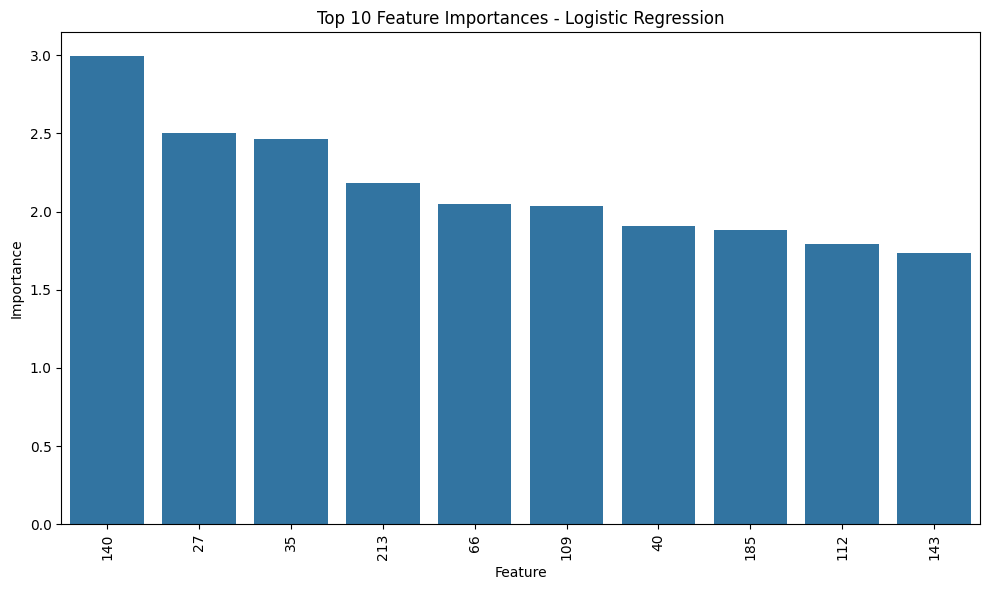

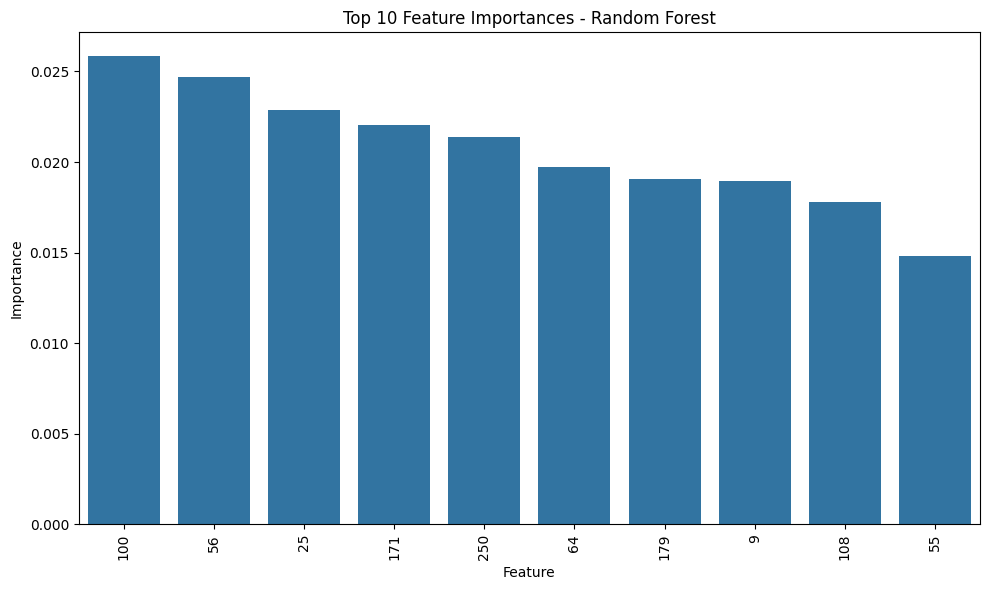

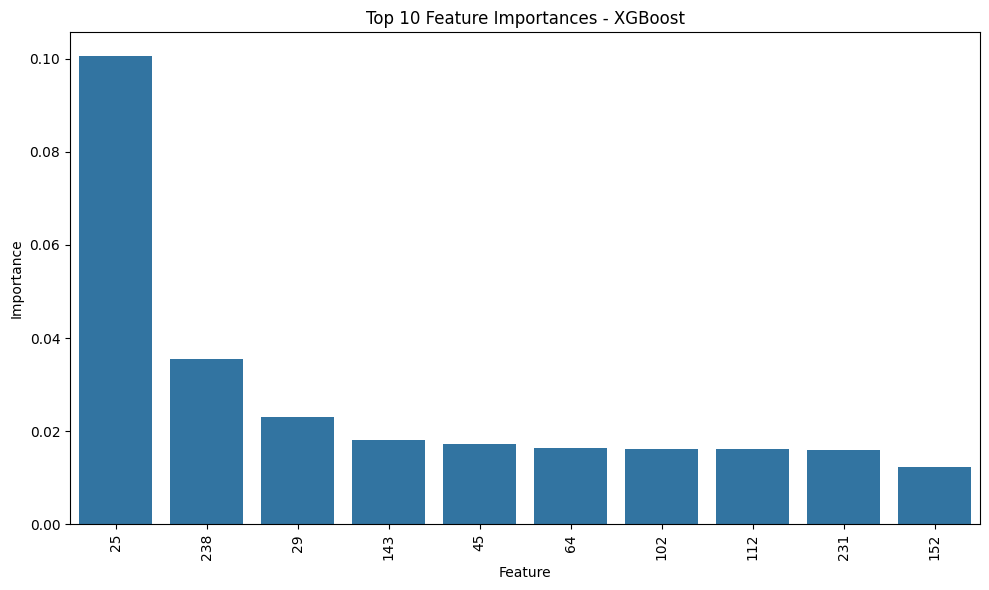

In [218]:
# Visualize the top 10 most important features
for name, importance_df in feature_importances.items():
    plt.figure(figsize=(10,6))
    sns.barplot(x=importance_df.head(10)['feature'], y=importance_df.head(10)['importance'])
    plt.title(f"Top 10 Feature Importances - {name}")
    plt.xticks(rotation=90)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()

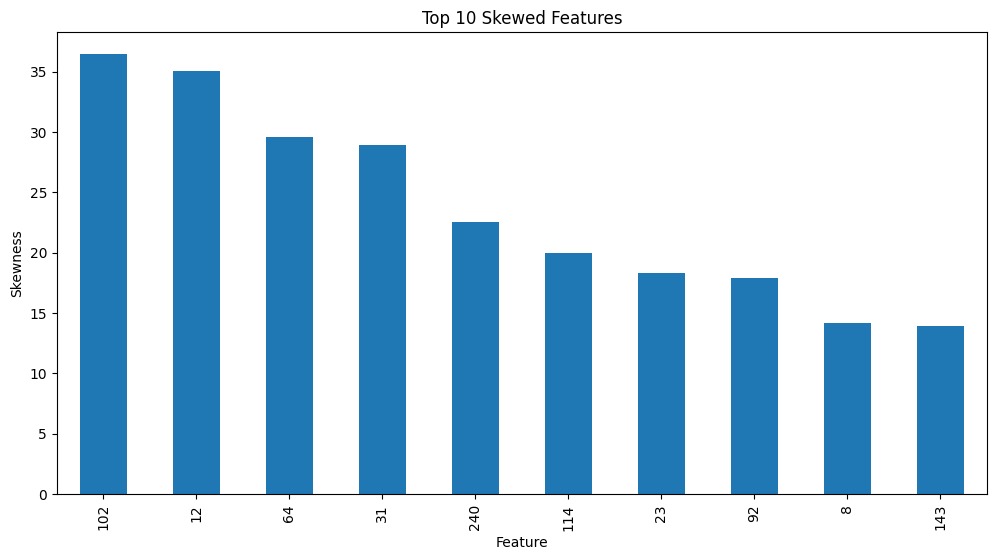

In [219]:
# Visualizing Skewed Data Distributions
plt.figure(figsize=(12, 6))
df_reduced.skew().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Skewed Features")
plt.xlabel("Feature")
plt.ylabel("Skewness")
plt.show()

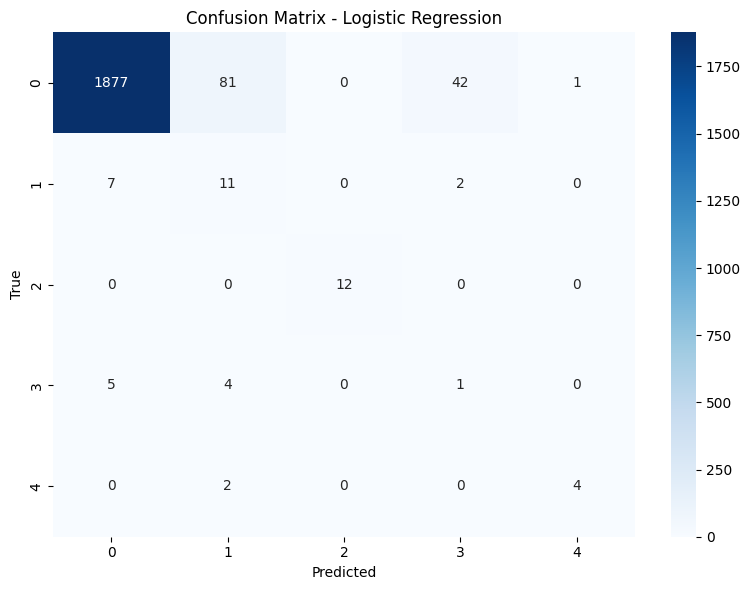

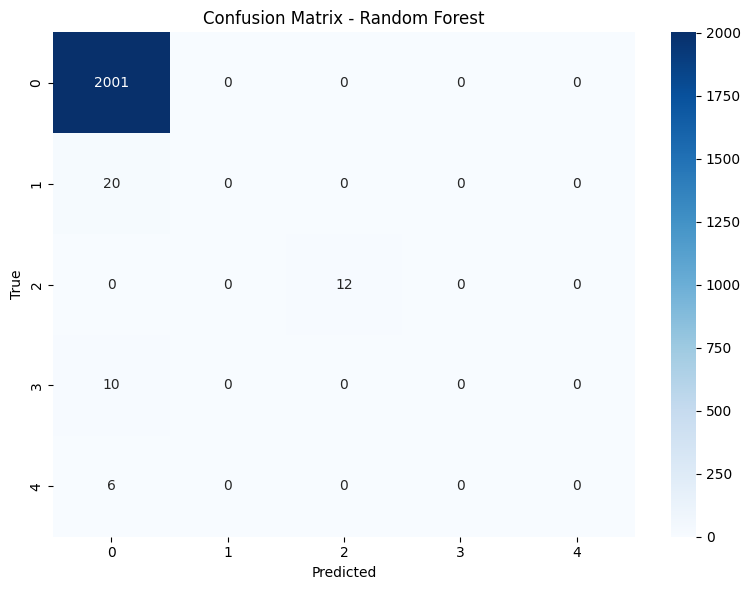

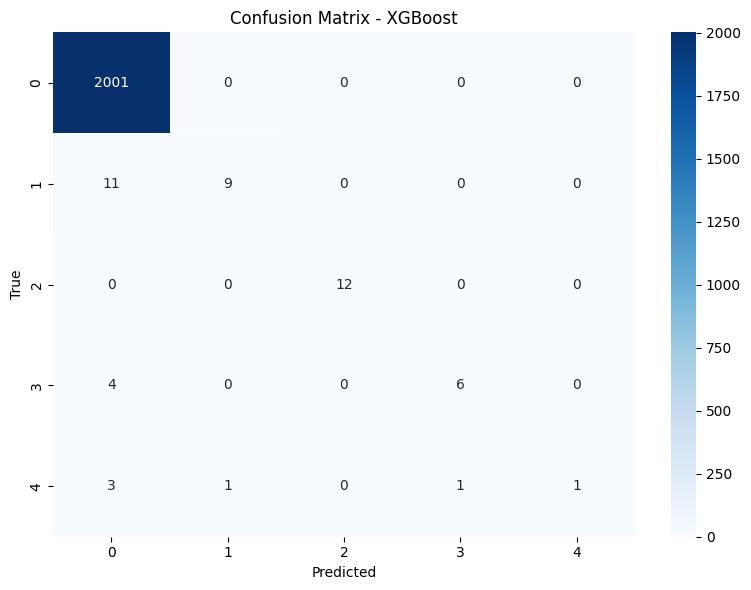

In [220]:
# Confusion matrix
for name, result in model_results.items():
    y_pred = result['y_pred']
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()